## Планирвоание рекламной кампании на 2017-й год. 

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Нам нужно выбрать потенциально популярные продукты и спланировать рекламные кампании. 

#### Задача
    Выявить закономерности определяющие успешность игры. 



### Описание данных
- Name — название игры

- Platform — платформа

- Year_of_Release — год выпуска

- Genre — жанр игры

- NA_sales — продажи в Северной Америке (миллионы долларов)

- EU_sales — продажи в Европе (миллионы долларов)

- JP_sales — продажи в Японии (миллионы долларов)

- Other_sales — продажи в других странах (миллионы долларов)

- Critic_Score — оценка критиков (максимум 100)

- User_Score — оценка пользователей (максимум 10)

- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


### Рейтинги ESRB
- «EC» («Early childhood») — «Для детей младшего возраста», от 3х лет;
- «E» («Everyone») — «Для всех», старше 6 лет;
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет», от 10 лет;
- «T» («Teen») — «Подросткам 13—19 лет», старше 13 лет;
- «M» («Mature») — «От 17 лет», от 17 лет;
- «AO» («Adults Only 18+») — «Только для взрослых»;
- «RP» ( «Rating Pending»») — «Рейтинг ожидается», ожидает присвоение рейтинга;

## Оглавление

### Глава 1. Загрузка библиотек и данных
     - Импорт библиотек
     - Загрузка данных и изучение общей информации
     - Вывод

### Глава 2. Предобработка данных
     - Работа с пропусками
     - Изменения типов данных

### Глава 3. Исследовательский анализ данных
     - Количество выпускаемых игр в различные периоды
     - Изменение продаж по платформам
     - Изучение потенциально прибыльных игровых платформ, лидирующих по продажам
     - Тенденция роста и падения продаж по годам и игровым платформам
     - «Ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам
     - График сравнения глобальной продажи конкретных игр на разных платформах
     - Распределение игр по жанрам
     - Вывод

### Глава 4. Портрет пользователя каждого региона

     - Расчёт для NA / North America
     - Расчёт для EU / Europe
     - Расчёт для JP / Japan
     - Вывод

### Глава 5. Формирование и проверка гипотез
     - Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
     - Гипотеза Средние пользовательские рейтинги жанров Action и Sports разные

### Финальный вывод

### Глава 1. Загрузка библиотек и данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
from scipy import stats as st

### Загрузка данных и изучение общей информации


In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*16 715 записей.* Количество и названия столбцов совпадает с заявленными.

In [5]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Обнаружены пропущенные значения в колонках:
- Name и Genre — название игры и жанр. Всего по два пропуска, думаем это не критично и не повлияет на дальнейшее исследование. 
- Year_of_Release — год выпуска. Нужно изучить подробнее, чтобы понять с чем связаны пропуски.  
- Critic_Score — оценка критиков. Возможно пропуски связаны с техническими ошибками. 
- User_Score — оценка пользователей. Возможно, пользователи не оценивают определнные игры. Хотя, как мы видим дальше, определенная часть  пропущенных значений характерны пропускам в колонках «оценка критиков» и «рейтинг». 
- Rating — рейтинг от организации ESRB. Нужно изучить подробнее, чтобы понять с чем связаны пропуски  и что с ними делать.

#### Решение:
Мы не будем заменять пропуски в «critic_score» и «user_score» медианой или средним, потому что это не логично, оценка критиков и пользователей зависит от игровой платформы и жанра игры. Таким образом, если мы заменим пропуски на медиану, данные будут не валидными и это сильно сместит распределение. Поэтому, пропущенные значения заменим на ноль.


#### Изменение типов данных:
- NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score — привести к целочисленному формату.
- Year_of_Release — привести к формату даты. 
- Name, Platform, Genre — привести к нижнему регистру. 

##### Подробное изучение первичных данных

In [6]:
len(games['Name'].unique()) # Колличество игр в датасете

11560

In [7]:
games['Platform'].value_counts() # Смотрим какие игровые платформы присутсвуют в данных

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
games['Genre'].value_counts() # Взглянем какие жанры находятся в сете

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
# Посмотрим какие значения есть в рейтинге
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

 Это текстовое поле. Заменим пропуски на NoRate 

In [10]:
games.duplicated().sum() # Дубликаты в фрейме отсутствуют

0

### Вывод
Мы получили таблицу с большим количеством данных, часть которых представлена некорректно. Помимо ошибок технического характера, таких как пропущенные значения, присутвуют неприемлемые форматы.

## Глава2. Предобработка данных

In [11]:
games2 = games.copy() # Создаем копию сета, чтобы ничего не потяерять

In [12]:
games2.columns = [c.lower() for c in list(games2.columns)] # Приводим названия колонок к нижнему регистру

In [13]:
games2.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Работа с пропусками

Cреди пропущенных значений в оценке пользователей обнаружены значения tbd (to be defined) — «дата выхода». Это плейсхолдеры, которые, видимо должны были быть заполнены позднее или для них не было данных на момент выгрузки. 

###### Решение 
Заменить значения «tbd» на ноль

In [14]:
to_be_defined = games2['user_score'] != 'tbd'
games2['user_score'] = games2['user_score'].where(to_be_defined, 0)

In [15]:
games2 = games2.dropna(subset=['name', 'genre']) # Удаляем пропуски в колонке имени и жанра

Заменяем пропуски в «critic_score» и «user_score»

In [16]:
games2['critic_score'] = games2['critic_score'].fillna(value = 0) # Заменяем пропуски в оценке критиков на ноль
games2['user_score'] = games2['user_score'].fillna(value = 0) # Заменяем пропуски в оценке пользователей на ноль

In [17]:
# Заменяем пропущенные значения в колонке «rating» на «NoRate»
games2['rating'] = games2['rating'].fillna(value = 'NoRate')

- Работа с пропусками в «year_of_release» — дата выпуска. Всего у нас 269 пропусков из 16 тыс. записей — это примерно 1,7 %. Это не является критичным для нашего исследования, поэтому мы удалим пропуски. 


In [18]:
games2.dropna(subset=['year_of_release'], inplace=True)

### Изменение типов данных

In [19]:
games2 = games2.astype({"year_of_release": int, "critic_score": float, "user_score": float})
# Переводим данные в дате выпуска в целые числа. Оценка критиков была в формате чисел с плавающей запятой,
# поэтому для корреляции, оценку пользователей приводим к общему формату.



In [20]:
games2['year_of_release'] = pd.to_datetime(games2['year_of_release'], format='%Y') # Переводим в формат даты
games2['year_of_release'] = pd.DatetimeIndex(games2['year_of_release']).year # Выделяем отдельную часть даты — год

In [21]:
games2['name'] = games2['name'].str.lower() # Переводим в нижний регистр
games2['platform'] = games2['platform'].str.lower()
games2['genre'] = games2['genre'].str.lower()

In [22]:
games2.head() # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,NoRate
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,NoRate


## Глава 3. Исследовательский анализ данных

Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

In [23]:
games2['total_sale'] = games2.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) 
# Через метод loc получаем доступ ко всем значениям строк в указанных столбцах.

### Количество выпускаемых игр в различные периоды

In [24]:
games_release_in_year = (
        games2[['name', 'year_of_release']]
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False))
# Делаем сводник по названиям игр и дате релиза. Далее сортируем по дате выпуска

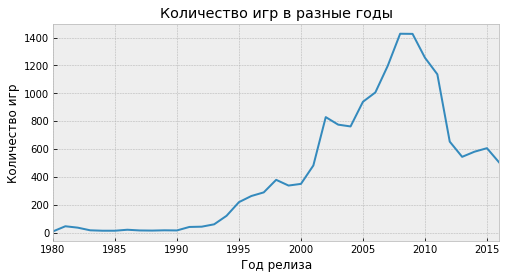

In [25]:
plt.style.use('bmh')

(
games_release_in_year.plot(figsize=(8,4), title='Количество игр в разные годы', legend=False)
    .set(xlabel='Год релиза', ylabel='Количество игр'))
plt.show()
# Строим график распределния по нашей сводной таблице. Используем дизайнерский стиль bmh. 
# Красивый стиль подходит для научной графики, и показывает точность сюжета. 
# Недавно подглядел этот график в галерее документации matplotlib

Мы видим, что активный рост количества выпускаемых игр начинается с 1995 года. Предполагаем, что это связано с общим развитием технологий: новое поколение компьютеров, видео, носители памяти, фотокамера, язык программирвоания Java и т.д. Благодаря этому произошло развитие игровых платформ и медиа контента. Появляются новые жанры игр, доступность и различные доработки игровых процессов. 

Пик релизов приходится на 2008-2009 г. После этого, происходит спад, который может быть связан с рядом причин: перенасыщение рынка, появление ведущих-игровых платформ (крупные игроки), качество продукта, определение ведущего жарнра (потребность пользователя), эксклюзивные игры для конкретной платформы. 

В целом, рассматривая график мы понимаем, что нам не пригодятся данные до 95 года. Достаточно периода промежутков в 10 лет. 


### Изменение продаж по платформам

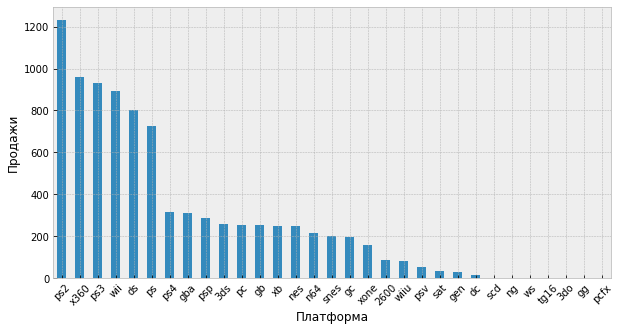

In [26]:
total_sale_on_platform = (
        games2.pivot_table(index='platform', values='total_sale', aggfunc='sum')
        .sort_values('total_sale', ascending=False)
        .plot(kind='bar', y='total_sale', figsize=(10, 5), legend=False, rot=45)
        .set(xlabel='Платформа', ylabel='Продажи')
)
# Делаем сводник по суммарным продажам и различным игровым платформам
# Рисуем по ним график типа bar chart — столбчатая диаграмма

Лидер продаж игровая платформа ps2 — вторая версия игровой приставки Sony, выпущеная в 2000м году и повлиявшая на игровую индустрию. Видимо она лучше всего удовлетворяет запросы пользователей. 

Конкуренцию ей составляет Xbox 360 — игровая приставка компании Microsoft. Она отличается своим функционалом и популярна у определенной группы пользователей. 

Прямым конкурентом Xbox 360 и ps2 является игровая приставка Wii — консоль фирмы Nintendo, отличается своим инновационными контроллерами и ориентирована на более широкую аудиторию. Возможно, такой разрыв по продажам связан с периодами между релизами Xbox 360 и PS3.

Sony PlayStation 3 (PS3) имеет более низкие продажи, чем ps2. А ps4, продается гораздо хуже чем ее предшественники. Возможно, это связано с с ценовой разницой на данные платформы и удовлетворенностью аудитории стандартным функционалом игровой приставки. 

Для дальнейшего исследования мы выберем первые пять платформ из списка с самыми большими продажами, и посмотрим как они распределяются по годам. 

In [27]:
top5 = (games2.pivot_table(index='platform', values='total_sale', aggfunc='sum')
       .sort_values('total_sale', ascending=False).head(5))
# Выделяем топ 5 платформ через сводник

In [28]:
top5

,total_sale
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78


In [29]:
def top5_total_sale_platform_in_year(name, actual_games):
    '''
    Продажи по платформам, распределённые по годам
    '''
    return(
    actual_games
        .query('platform == @name')
        .pivot_table(index='year_of_release', values='total_sale', aggfunc='sum')
        .sort_values('year_of_release', ascending=False)
    )
# Создаем функцию собирающую продажи по плафтормам, распределённые по годам  


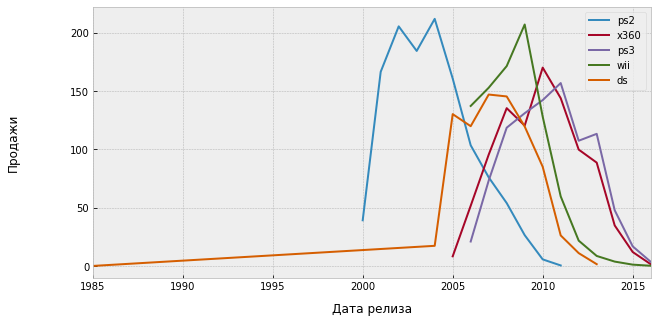

In [30]:
for platform in list(top5.index):
    top5_total_sale_platform_in_year(platform, games2)['total_sale'].plot(figsize=(10, 5), label=platform)
    plt.xlabel('Дата релиза', labelpad=10)
    plt.ylabel('Продажи', labelpad=50)
    plt.legend()
# Используем цикл для построения линейного графика продаж по платформам, распределённых по годам    

Таким образом, с разницей примерно в 10 лет появляются новые игровые платформы и исчезают — старые. Также, судя по графику, мы понимаем, что нам не нужно использовать данные за все временные периоды. Достаточно взять актуальный период шагом в 10 лет и изучить игры на современных платформах. 

In [31]:
actual_year = (games2['year_of_release'] > 2006) & (games2['year_of_release'] <= 2016)
actual_game = games2.loc[actual_year]
# Делаем актуальный период 2006-2016 г. 

### Изучение потенциально прибыльных игровых платформ, лидирующих по продажам

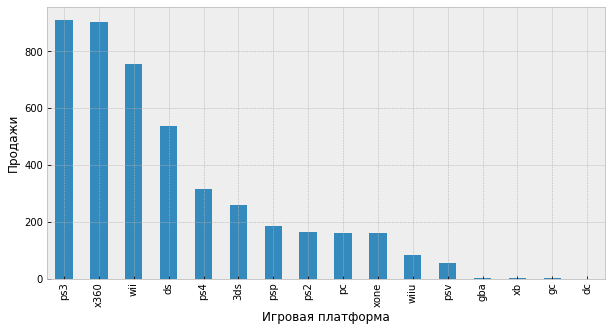

In [32]:
leader_sales = (actual_game.pivot_table(index='platform', values='total_sale', aggfunc='sum')
               .sort_values('total_sale', ascending=False)
               .plot(kind='bar', y='total_sale', figsize=(10, 5), legend=False)
               .set(xlabel='Игровая платформа', ylabel='Продажи')
               )
plt.show()
# Строим столбчатую диаграмму лидеров продаж. Для этого делаем сводник по актуальному периоду и продажам.

Итак, правильно выбранный временной период — расставляет всё по своим местам. Теперь мы видим, что лидером продаж является консоль PS3 (Sony), её прямым конкурентом — консоль Xbox 360 (Microsoft).  Wii (Nintendo) на третьей строчке чарта. 

Теперь нужно изучить динамику игровых платформ, чьи продажи растут и наоборот. 

### Тенденция роста и падения продаж по годам и игровым платформам



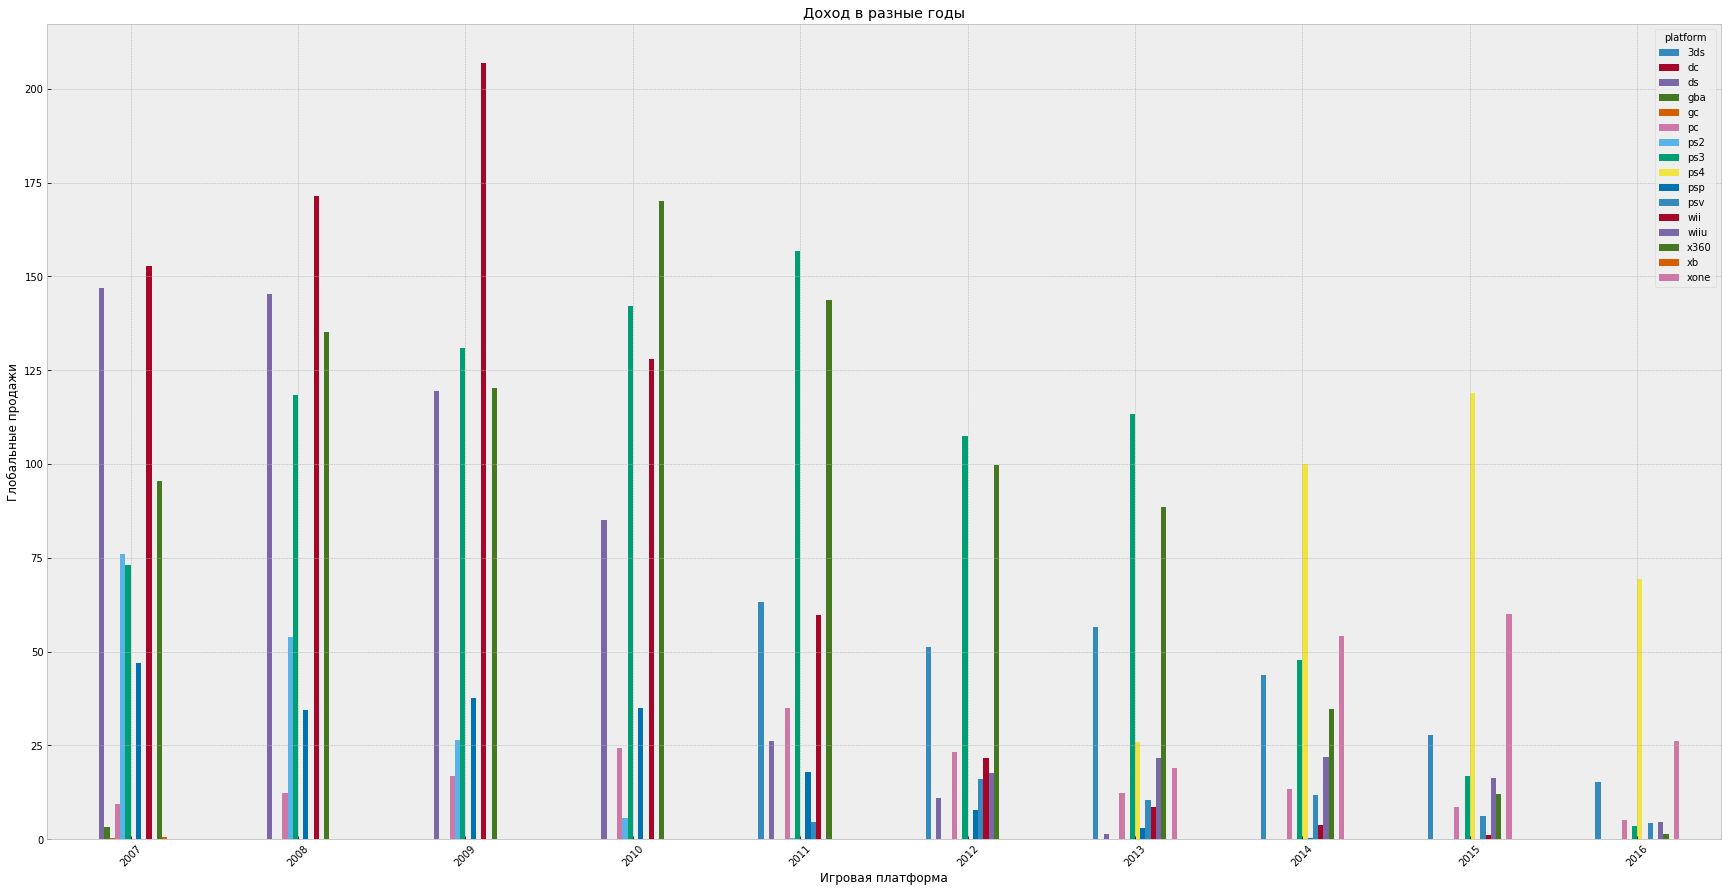

In [33]:
actual_game.pivot_table(index='year_of_release', columns='platform',
                                            values='total_sale', aggfunc='sum',
                                            fill_value=0).plot(kind='bar'
                                            , grid=True, figsize=(30, 15), title='Доход в разные годы', rot=45 
                                            ).set(xlabel='Игровая платформа', ylabel='Глобальные продажи')
plt.show()

# Строим сводник и график за актуальный период по дате, игровым платформам и глобальным продажам

Довольно трудно разобраться в данном графике, так как представлено большое количество значений (платформ) и схожие цвета обозначений. Нужно либо сократить период замера, либо использовать другую визуализацию. 

На первый взгляд, мы видим, что несмотря на выявленных ранее лидиров продаж за актуальный период, большая часть игровых консолей проседает по продажам к 2012 году и вовсе исчезает к 2016му. Тоже самое касатеся PS3 (Sony) и Xbox 360 (Microsoft) — их продажи значительно падают к 2013 году. А Wii (Nintendo) стремительно падает по продажам к 2011году. Да и в целом, объем продаж компьютерных игр с каждым годом все меньше. 

Но появляются перспективные новички — игровые консоли нового поколения: PS4 (Sony) = 124 млн. за 2015 год, и XONE (новая игровая приставка от Microsoft) = 70 млн.

Помимо этого мы отмечаем игровую платформу 3DS (Nintendo) = 20 млн. за 2016 год. Это новая портативная игровая система от компании Nintendo. Видимо компания уступая Sony и Microsoft, переориентировалась на новый рынок. 

Итак, на данный момент потенциально прибыльными платформами являются Sony Plastation 4 и Xbox One. Тенденция роста приходится на 2015-2016 год — отметим его как новый актуальный период. 



### «Ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам

In [34]:
top5_games_in_10years = (actual_game.pivot_table(index='name', values='total_sale', aggfunc='sum')
             .sort_values('total_sale', ascending=False).head(5))
# Делаем сводник топ 5 игр по продажам за актуальный период в 10 лет.

In [35]:
top5_games_in_10years

,total_sale
name,
grand theft auto v,56.58
mario kart wii,35.52
wii sports resort,32.77
call of duty: modern warfare 3,30.60
call of duty: black ops ii,29.40


«grand theft auto v» на первом месте, далее идут симулятор спорта и шутеры. 

In [36]:
top_5 = games2.query('year_of_release >= 2015').groupby(['name'], 
            as_index = False)['total_sale'].sum().sort_values('total_sale', 
                                ascending = False).head(5)['name'].tolist()
# Делаем срез для новой пятерки за новый актуальный период (2015-2016 г.)

In [37]:
top_5

['call of duty: black ops 3',
 'fifa 16',
 'fallout 4',
 'star wars battlefront (2015)',
 'fifa 17']

Выделяются новые игры. На первых местах шутеры и спорт. Позже узнаем общее распределение игр по жанрам, а сейчас можем предположить, что большим спросом пользуются динамичные игры.

In [38]:
top_5_for_platform = games2.query('year_of_release >= 2015').groupby(['platform'], 
            as_index = False)['total_sale'].sum().sort_values('total_sale', 
                                ascending = False).head(5)['platform'].tolist()
# Делаем срез за новый период по платформам. Убедимся, что в топе потенциально прибыльные платформы,
# которые мы выделили ранее.

In [39]:
top_5_for_platform

['ps4', 'xone', '3ds', 'wiiu', 'ps3']

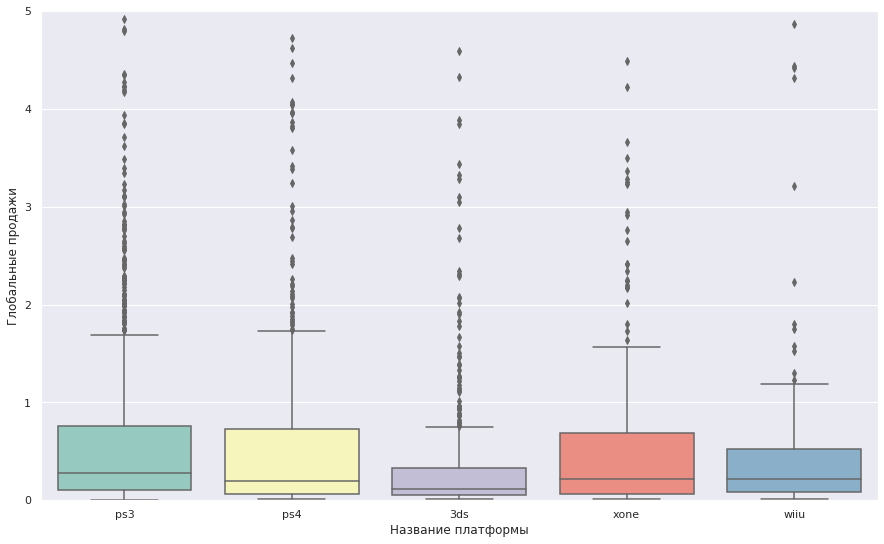

In [40]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)}) # настраиваем размер самого графика в jupyter
ax = (sns.boxplot(x="platform", y="total_sale", 
                  data= games2.query('platform in @top_5_for_platform'), palette="Set3")
                  .set(ylim=(0,5), xlabel='Название платформы', ylabel='Глобальные продажи' )
                  
     )



# Импортируем новую библиотеку seborn для построения красивых визуализаций.
# Строим «ящик с усами» по глобальным продажам на разных игровых платформах. 

Несмотря на то, что на графике распределения в основном показаны «выбросы», мы отмечаем ведущую позицию у компании Sony. Глобальные продажи игр на её игровых консолях (PS3 и PS4) превышают продажи на платформах Xbox One и 3DS.

Рассмотрим продажи топовых игр по отедльности.

#### График сравнения глобальной продажи конкретных игр на разных платформах

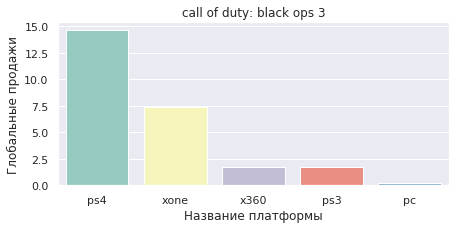

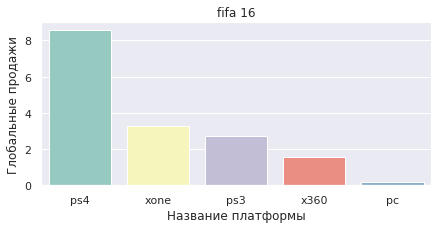

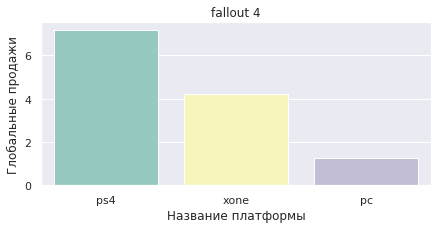

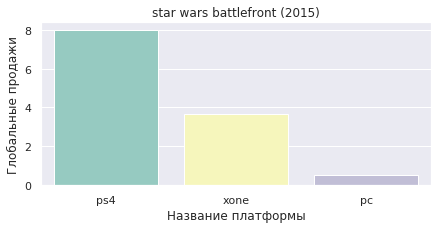

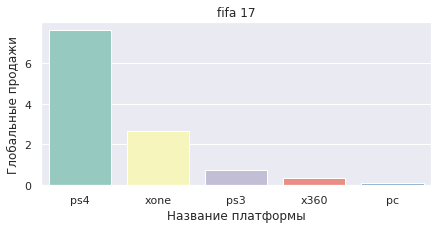

In [41]:
sns.set(rc={'figure.figsize':(7,3)})
for game in top_5:
    plt.figure()
    plt.title(game)
    ax = (sns.barplot(x="platform", y="total_sale", 
                      data = games2.query('name == @game'), palette="Set3")
                      .set(xlabel='Название платформы', ylabel='Глобальные продажи'))
# Прописываем цикл, чтобы сразу посмотреть все графики по выбранным топовым играм


Для удобства, представим все на одной иллюстрации

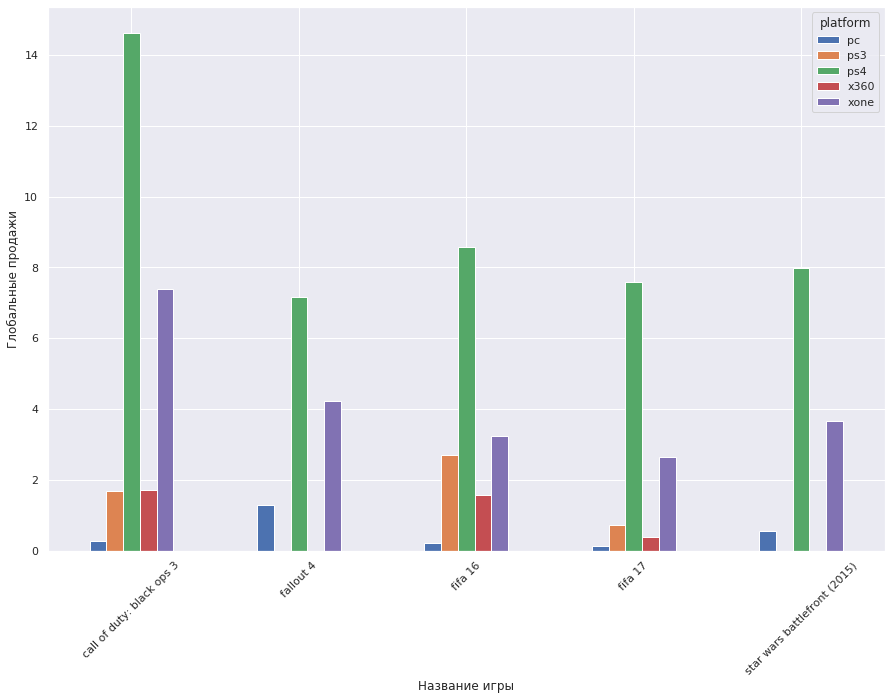

In [42]:
(games2.query('name in @top_5').pivot_table(index='name',
                               columns='platform',values='total_sale', 
                               aggfunc='sum', fill_value=0)
     .plot(kind="bar", grid=True,figsize=(15,10), rot=45)
     .set(xlabel='Название игры', ylabel='Глобальные продажи'))
plt.show()
    




Судя по графикам, сумма глобальных продаж по популярным играм у PS4 в 2 раза больше чем у Xbox One. Sony однозначно лидирует.  Возможно, это связано с качеством игровых консолей передающимся из поколения в поколение, или с «крутыми» играми по любимым сюжетам.

Интерессно, с чем связан такой выбор покупателей? Оказывает ли влияние на их выбор оценки критиков и отзывы пользователей? Существуют ли культурные различия в выборе покупателей?

### Влияние отзывов критиков и пользователей на продажи внутри одной популярной платформы


In [43]:
actual_period = (games2['year_of_release'] >= 2015)
new_actual_period = games2.loc[actual_period]
# Создаем новый актуальный период, по аналогии так, как мы это делали раньше

In [44]:
ps4 = new_actual_period.query("platform == 'ps4'")
xone = new_actual_period.query("platform == 'xone'")
# Делаем срез по актуальному периоду и соответвующим платфорама. Этих лидеров мы выделили раньше.

In [45]:
rating = ['user_score', 'critic_score', 'total_sale']
# Готовим колонку для подсчета корреляции 

In [46]:
ps4[rating].corr()

,user_score,critic_score,total_sale
user_score,1.000000,0.888693,0.075201
critic_score,0.888693,1.000000,0.181879
total_sale,0.075201,0.181879,1.000000


In [47]:
xone[rating].corr()

,user_score,critic_score,total_sale
user_score,1.000000,0.757555,0.066263
critic_score,0.757555,1.000000,0.227812
total_sale,0.066263,0.227812,1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


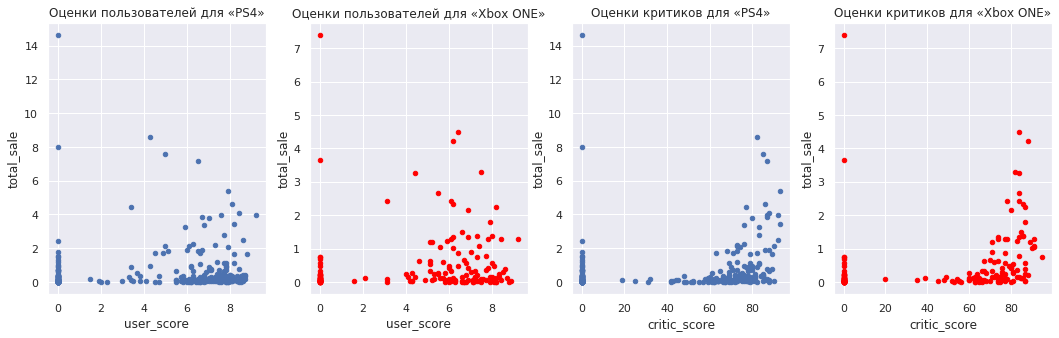

In [48]:
plt.subplots(figsize=(18,5))
plot = ps4.plot(x='user_score', y='total_sale', kind='scatter', title='PS4', ax=plt.subplot(1,4,1))
plt.title('Оценки пользователей для «PS4»')
plot = xone.plot(x='user_score', y='total_sale', kind='scatter', title='Xbox ONE', color='red', ax=plt.subplot(1,4,2))
plt.title('Оценки пользователей для «Xbox ONE»')
plot = ps4.plot(x='critic_score', y='total_sale', kind='scatter', title='PS4', ax=plt.subplot(1,4,3))
plt.title('Оценки критиков для «PS4»')
plot = xone.plot(x='critic_score', y='total_sale', kind='scatter', title='Xbox ONE', color='red', ax=plt.subplot(1,4,4))
plt.title('Оценки критиков для «Xbox ONE»')
plt.show();

# Строим диаграммы рассеяния для анализа

Судя по диаграммам и подсчитаной ранее корреляции взаимосвязь между оценкой пользователей и продажами по обеим игровым платформам не наблюдается. Оценка критиков имеет чуть большую взаимосвязь с продажами на двух платформах, но так же — не значительна. При этом, на диаграммах видно, что чем выше оценка критиков, тем выше продажа игр по обеим платформам.

Возможно, оценки критиков более объективны и встречаются чаще (журналы, анонсы, сайты и пр.), поэтому они каким-то образом влияют на продажи. Оценки пользователей, наоборот, могут быть неинформативными и субъективными, поэтому потенциальные покупатели не придают им значения. Также, наблюдается большая взаимосвящь между оценкой пользователей и оценкой критиков. 

В любом случае, это не объясняет причинно-следственную связь между наличием оценки и продажей.

### Распределение игр по жанрам

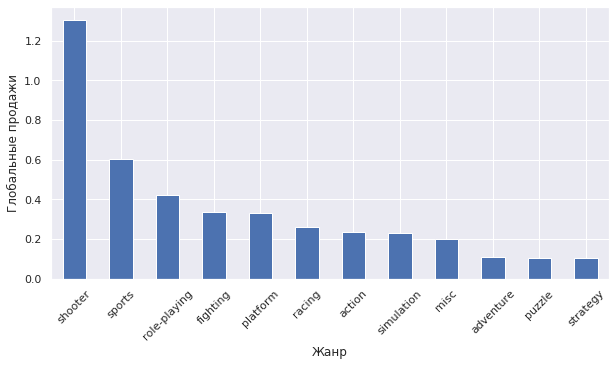

In [49]:
(new_actual_period
    .pivot_table(index='genre', values='total_sale')
    .sort_values('total_sale', ascending=False)
    .plot(kind='bar', y='total_sale', figsize=(10,5), legend=False, rot=45)
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))
plt.show()

Самые популярные по жанрам являются шутеры и спортивные игры. Также, ролевые игры пользуются спросом. И наоборот, к самым непродающимся жанрам относятся стратегии. Возможно, пользователей больше привлекают динамичные игры, моделирующие фантастические события. Те, в которых примеряются разные амплуа. Почувствовать себя звездой футбола, или спасти мир от инопланетян, например. А игры, с более долгим вовлечением не вызывают интерес. 

Предполагаем, что вкус пользователй зависит от культурных особенностей страны. То есть, нужно учитывать региональные продажи. 


## Вывод

Итак, на данный момент потенциально прибыльными платформами являются Sony Plastation 4 и Xbox One. Тенденция роста приходится на 2015-2016 год.  Ведущую позицию занимает компания Sony. Глобальные продажи игр на её игровых консолях (PS3 и PS4) в два раза выше чем у Xbox One и 3DS.

Самые популярные по жанрам являются шутеры и спортивные игры. Также, ролевые игры пользуются спросом. И наоборот, к самым непродающимся жанрам относятся стратегии.

Взаимосвязь между оценкой пользователей и продажами по обеим игровым платформам (Sony Plastation 4 и Xbox One) — не наблюдается. Оценка критиков, чуть больше влияет на продажи в двух платформах, но так же — не значительна. Высокие оценки критиков не всегда приводят к высоким продажам, однако пользователи доверяют им больше.



## Глава 4. Портрет пользователя каждого региона

### Расчёт для NA / North America

In [50]:
region = 'na_sales'

In [51]:
def top_5_in_region(column):
    return (
    new_actual_period
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
    )

In [52]:
def pie_sale_by_region(na):
    (
    na
        .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10,5), legend=False)
        .set(ylabel='Продажи по региону')
    )
    plt.show()
    

#### Самые популярные платформы (топ-5) в США

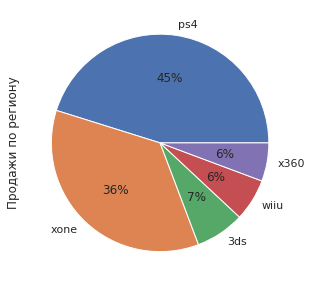

In [53]:
plot = pie_sale_by_region(top_5_in_region('platform'))

В США наиболее популярными игровыми платформами являются: PS4 (Sony)  и  Xbox One (Microsoft). Видимо в штатах, происходит смена тенденции в выборе зарубежных производителей игровых консолей.

#### Самые популярные жанры (топ-5) в США

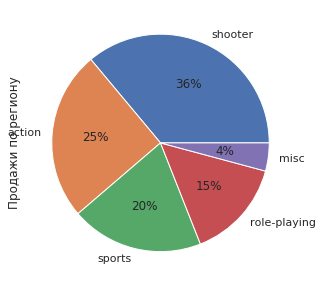

In [54]:
pie_sale_by_region(top_5_in_region('genre'))

Поппулярными игровыми жанрами оказались шутеры, экшен и сорт. Американские пользователи предпочитают динамичные игры.

#### Влияние игрового рейтинга на продажи игр в США (топ-5)

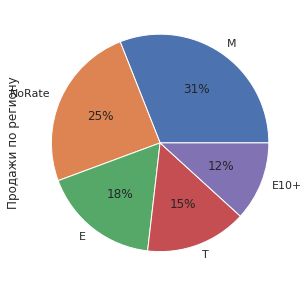

In [55]:
pie_sale_by_region(top_5_in_region('rating'))

Самый распространенный игровой рейтинг сконцентрирован на взрослой аудитории (люди старше 17 лет) и подростках. Далее идет детский сегмент (дети старше 6 лет).  Таким образом, предположительно большую часть игр покупают люди в возсрасте 18-30 лет. Нужно детальнее изучить данную аудиторию, чтобы разделить их на характерные подкатегории: возраст и вкусовые предпочтения.

### Расчёт для EU / Europe

In [56]:
region = 'eu_sales'

#### Самые популярные платформы (топ-5) в Европе

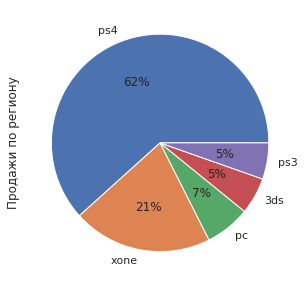

In [57]:
plot = pie_sale_by_region(top_5_in_region('platform'))

Абсолютным лидером среди игровых платформ в Европе является PS4 (Sony).

#### Самые популярные жанры (топ-5) в Европе

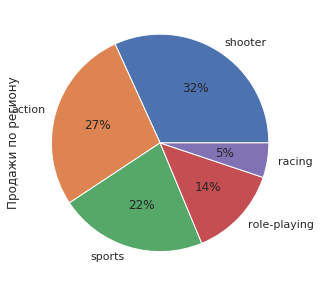

In [58]:
pie_sale_by_region(top_5_in_region('genre'))

Популярными жанрами оказались шутеры, экшен и спорт. Точно также, как и в штатах. Однако, присутствует маленькая доля игрового жанра «гонки», отличающаяся от другого региона. 

#### Влияние игрового рейтинга на продажи игр в Европе (топ-5)

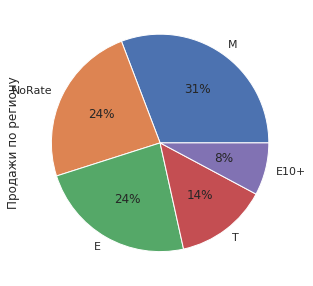

In [59]:
pie_sale_by_region(top_5_in_region('rating'))

Суммарно, в Европе значительно преобладают продажи в детском и подростковом сегменте (E10+, T, E). То есть, игровая индустрия в большей стпени направлена на молодую аудиторию возраста от 10 до 19 лет.

### Расчёт для JP / Japan

In [60]:
region = 'jp_sales'

#### Самые популярные платформы (топ-5) в Японии

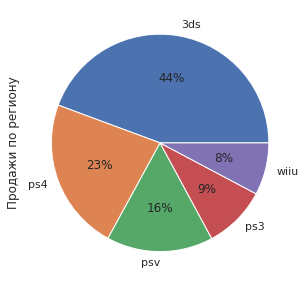

In [61]:
plot = pie_sale_by_region(top_5_in_region('platform'))

Итак, самой продаваемой и популярной игровой платформой оказалась 3DS (Nintendo). Напомним, это новая портативная игровая система. Видимо, японские пользователи предпочитают мобильность и доступность игр независимо от местонахождения (дом, транспорт, улица и пр.). 

Сумарно консоли (PS3, PS4, PSV) от Sony составляют вторую часть японского рынка. Таким образом, в Японии кардинально другая картина: пользователи предпочитают портативные консоли и не выбирают зарубежные игровые платформы.


#### Самые популярные жанры (топ-5) в Японии

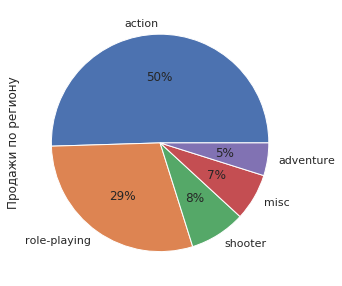

In [62]:
pie_sale_by_region(top_5_in_region('genre'))

Экшен — самый популярный жанр. Далее, значительно выражен role-playing — жанр RPG игр. Те, в которых нужно выбирать персонажа, прокачивать его и выполнять сюжет, либо исследовать открытый мир. То есть, некоторое перевоплощение пользователя в аватар, и наделения его улучшенными характеристиками. Учитывая общую современную культуру Японии (касплей и пр.), такие игры близки для данной аудитории. 

Жанр спортивных игр, вообще не присутствует в топовой пятерке, в отличии от других регионов. Возможно, это опять же связано с культурными и национальными различиями. То есть, в Японии слабо развиты такие виды спорта, как футбол, баскетбол, хоккей, бокс и пр. Те виды спорта, которые культивируются на Западе и в Европе, и часто моделируются в витруальных играх. 

#### Влияние игрового рейтинга на продажи игр в Японии (топ-5)

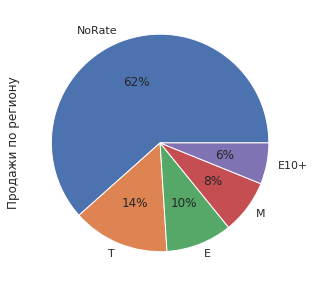

In [63]:
pie_sale_by_region(top_5_in_region('rating'))

Суммарно, лучше всего продаются игры в Японии для молодой аудитории (дети и подростки). Чуть хуже, для взрослой (юноши и взрослые). 

Наверное, это так же зависит от культурных особенностей в предпочтениях среди опредленного возраста. То есть, подростки ассоциируют себя с вымышленными и фантастическими персонажами, наделенными сверх силой и поэтому выбирают жанр RPG игр. А взрослые предпочитают динамичные игры, поэтому ориентируются на Экшен. И это может быть характерно, для данных национальных особенностей. 

И наоборот, подростки из Штатов и Европы, ассоциируют себя с реалььными персонажами (спортивные звезды, военные и пр) и поэтому предпочитают играть в шутеры и спортивные игры. 

### Вывод

Итак, подведем итог:

- В США и Европе наиболее популярными игровыми платформами являются: PS4 (Sony) и Xbox One (Microsoft). При этом в Европе доля игровых платформ компании Sony выражена намного лучше. 

- Для штатов и Европы популярными игровыми жанрами оказались шутеры, экшен и спорт. Однако, в Европе присутствует маленькая доля игрового жанра «гонки», отличающаяся от США.

- В США предположительно большую часть игр покупают люди в возсрасте 18-30 лет — взрослая аудитория. Далее на игровом рынке выступает  детский сегмент (дети старше 6 лет).

- В Европе значительно преобладают продажи в детском и подростковом сегменте. То есть, игровая индустрия в большей стпени направлена на молодую аудиторию возраста от 10 до 19 лет.

- В Японии кардинально другая картина: пользователи предпочитают портативные консоли 3DS (Nintendo) и консоли (PS3, PS4, PSV) от Sony. Пользователи не выбирают зарубежные игровые платформы.

- Для японской аудитории экшен — самый популярный жанр. Далее, значительно выражен role-playing — жанр RPG игр. Те, в которых нужно выбирать персонажа, прокачивать его и выполнять сюжет, либо исследовать открытый мир. Жанр спортивных игр, вообще не присутствует в топовой пятерке, в отличии от других регионов.

- Лучше всего продаются игры в Японии для молодой аудитории (дети и подростки). Чуть хуже, для взрослой (юноши и взрослые).

Таким образом, рисуя портрет пользователей для разных регионов, мы выделяем следующее:

- Для штатов это человек в возрасте 23-28 лет, играющий в стрелялки и спортивные игры на PS4.

- Для Европы это подростки в возрасте 17 лет, играющие в стрелялки и спортивные игры на PS4.

- Для Японии это дети и подростки, играющие в RPG на портативных консолях. 









## Глава 5. Формирование и проверка гипотез

У нас есть две генеральные совокупности PS (Sony) и Xbox (Microsoft). Для каждой из них мы проверим двухсторонние гипотезы о равенстве среднего, взятого из двух выборок. Также, проведем статистические тесты для проверки ризличия пользовательских рейтингов и разнице в значимости между средними значениями. 

#### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Мы рассматриваем две генеральные совокупности — это игры на разных игровых платформах.

*Нулевая гипотеза Н₀:* 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

*Альтернативная гипотеза Н₁:* 
- Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Пороговая значение alpha (критический уровень стат. значимости) задаем равным 5% (принятное, стандартное значение)

In [64]:
alpha = .05 # Задаем критический уровень статистической значимости

In [65]:
pc = new_actual_period.query("platform == 'pc'")

In [66]:
results = st.ttest_ind(
                xone['user_score'],
                pc['user_score']
            )
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза не отвергается')

p-значение: 0.3726755182886019
Нулевая гипотеза не отвергается


In [67]:
pc['user_score'].mean()

5.085576923076924

In [68]:
xone['user_score'].mean()

4.7401197604790415

Полученное p-value значение показывает, что средние пользовательские рейтинги платформ PC и Xbox One различаются, с вероятностью в 37%. Это довольно случайная величина, к тому же мы вывели средние значения, чтобы достоверно убедиться в наших действиях. 

Мы делаем вывод, что различие между средними пользовательскими рейтингами — не значительное. Таким образом, наша **гипотеза подтвержадется** — средние пользовательские рейтинги платформ PC и Xbox One — одинаковы.

#### Гипотеза Средние пользовательские рейтинги жанров Action  и Sports  разные

Мы рассматривае две генеральные совокупности — это игры разных игровых жанров.

*Нулевая гипотеза Н₀:* 
- Средние пользовательские рейтинги жанров Action и Sports — одинаковые.

*Альтернативная гипотеза Н₁:* 
- Средние пользовательские рейтинги жанров Action и Sports — отличаются.

Пороговая значение alpha (критический уровень стат. значимости) задаем равным 5% (принятное, стандартное значение)

In [69]:
alpha = .05 # Задаем критический уровень статистической значимости

In [70]:
action = new_actual_period.query("genre == 'action'")
sports = new_actual_period.query("genre == 'sports'")

In [71]:
print(np.var(games2.query("genre == 'action'")['user_score']))
print(np.var(games2.query("genre == 'sports'")['user_score']))
# Оцениваем дисперсию

13.462296458319484
13.26199112726031


Дисперсии наших выборок приблизительно равны. 

Мы взяли выборки из схожих по параметрам совокупностпей. Дисперсия каждой выборки будет оценена по объединённому датасету из двух выборок, а не для каждой по отдельности по значениям в ней самой.

Так делают, чтобы получить более точные результаты. Но только в том случае, если считать примерно равными дисперсии генеральных совокупностей, из которых взяты выборки.

Поэтому в нашем тесте, параметр «equal_var» мы устанавливаем как «True» (по умолчанию) — этот параметр считает дисперсии выборок равными. 

In [72]:
results = st.ttest_ind(
                action['user_score'],
                sports['user_score']
            )
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза не отвергается')

p-значение: 0.010648802104801127
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги по жанрам sport и action различаются. И практически нулевая вероятность, говорит нам, что такое отличие — не случайно. 

Наша гипотеза о том, что средние пользовательские рейтинги жанров разные — подтверждается. 

## Финальный вывод

Изучив все данные мы приходим к выводу, что в среднем игровые плафтормы появляются и исчезают в течение 10 лет. Однако платформы нового поколения имеют стремительные темпы роста и развиваются в течении двух лет. Это связано со многими факторами: общее техническое развитие, появление модных тенденций, экономические аспекты и т.д. 

К 2016 году наиболее популярными являются игровые консоли PS4 компании Sony и Xbox One от Microsoft. Они наиболее перспективны.

Для штатов и Европы популярными игровыми жанрами являются шутеры, экшен и спорт. В США предположительно большую часть игр покупают люди в возсрасте 18-30 лет — взрослая аудитория. В Европе значительно преобладают продажи в детском и подростковом сегменте. 

В Японии кардинально другая картина и отдельные рынок с уклоном в портативные консоли и ролевые игры. Лучше всего продаются игры в Японии для молодой аудитории (дети и подростки).

В целом по трем регионам основные аудитории — это молодые люди и детский сегмент. Видимо, это связано с тем, что новое поколение вырастает на новых технологиях и сразу включаются в тренды. 

*Обе наши гипотезы подтвердились:*
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные;

**Таким образом, успешность игры определяется следующими характеристиками:**

- игровая консоль нового поколения PS4;
- динамичный жанр игры: шутер, экшен, спорт; 
- группы аудиторий: молодая (19-27 лет), подростковая (14-18 лет) и детская (6-12 лет);
- учет другого рынка при масшатабных продажах. Японский рынок отличается от штатов и европейского рынков;

Дополнительно, для потенциально прибыльных продаж, нужно учитывать культурные особенности того или иного региона. Эксклюзинвые игры, которые есть только у определнного консоли и наоборот, межплатформенные выпуски. Соотносить игры и их жанры с событиями в медийной индустрии: новые фильмы, жизненные события или инди-хипстерские игры. Также, ориентироваться на портативные платформы.

